In [1]:
import folium
import csv
import findspark
findspark.init()
import pyspark
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
from pyspark import SparkConf
from pyspark.context import SparkContext
spark = SparkSession \
    .builder \
    .master("local[1]") \
    .getOrCreate()


Microsoft heeft wordt vaak vergeleken met een hele hoop concurenten op verschillende vlakken, in dit project gaan we deze bedrijven hun beurswaarde bekijken en vergelijken.

## Sony
Sony is een concurent op vlak van gameconsoles.  
De datasets van de beurs zitten vaak heel goed in elkaar dus er moeten niet veel anpassingen gebeuren.

In [2]:
Sony = spark.read.format('csv').option('header', 'true').load('../dataset/Sony.csv')
#Sony.take(10)

In [3]:
Sony_stock = Sony.rdd.map(lambda r: (r['Date'],float(r['Open']),float(r['Close']),float(r['High']),float(r['Low'])))
#Sony_stock.take(10)

In [4]:
Sony_close = Sony.rdd.map(lambda r: (r['Date'],float(r['Close'])))
#Sony_close.take(10)

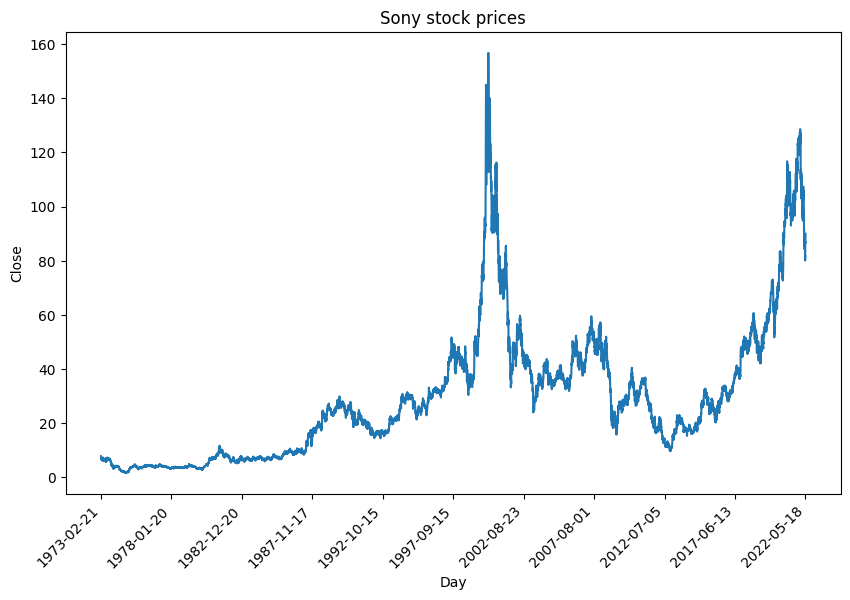

In [5]:
Date = Sony_stock.map(lambda r: r[0]).collect()
Open = Sony_stock.map(lambda r: float(r[1])).collect()
Close = Sony_stock.map(lambda r: float(r[2])).collect()
High = Sony_stock.map(lambda r: float(r[3])).collect()
Low = Sony_stock.map(lambda r: float(r[4])).collect()

plt.figure(figsize=(10, 6))
plt.plot(Date,Close)
plt.xticks(np.arange(0, 12423, step=1242))
plt.xticks(rotation=45, ha='right')
plt.xlabel('Day')
plt.ylabel('Close')
plt.title('Sony stock prices')
plt.show()

## Microsoft
Hier moet er alleen een split op de date gebruikt worden omdat deze ook de tijd meegeeft.

In [6]:
Microsoft = spark.read.format('csv').option('header', 'true').load( '../dataset/Microsoft_Stock.csv')
#Microsoft.take(10)

In [7]:
Microsoft_stock = Microsoft.rdd.map(lambda r: (r['Date'].split(' ')[0],float(r['Open']),float(r['Close']),float(r['High']),float(r['Low'])))
#Microsoft_stock.take(10)

In [8]:
Microsoft_close = Microsoft.rdd.map(lambda r: (r['Date'].split(' ')[0],float(r['Close'])))
#Microsoft_close.take(10)

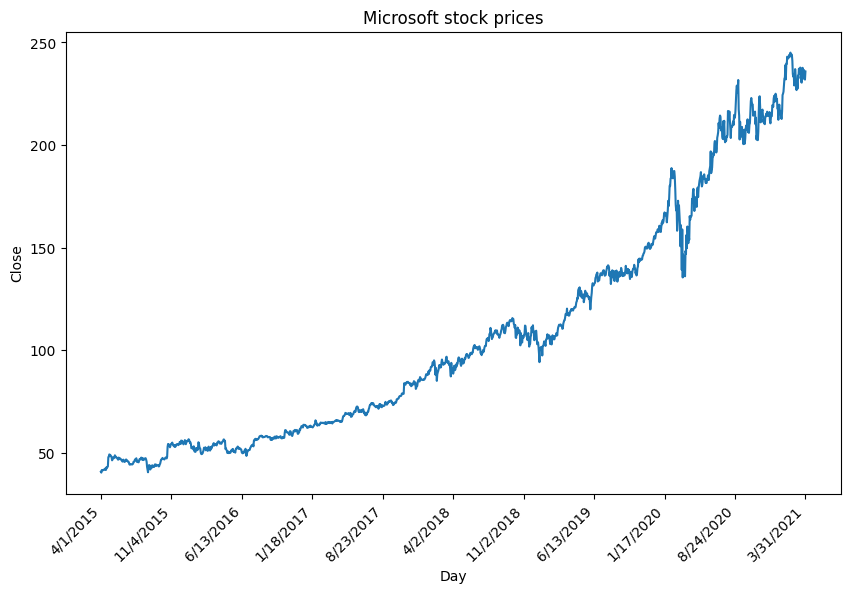

In [9]:
Date = Microsoft_stock.map(lambda r: r[0]).collect()
Open = Microsoft_stock.map(lambda r: float(r[1])).collect()
Close = Microsoft_stock.map(lambda r: float(r[2])).collect()
High = Microsoft_stock.map(lambda r: float(r[3])).collect()
Low = Microsoft_stock.map(lambda r: float(r[4])).collect()

plt.figure(figsize=(10, 6))
plt.plot(Date,Close)
plt.xticks(np.arange(0, 1511, step=151))
plt.xticks(rotation=45, ha='right')
plt.xlabel('Day')
plt.ylabel('Close')
plt.title('Microsoft stock prices')
plt.show()

We vergelijken ze nu.

In [10]:
def parse_date(row):
    date_str, value = row
    formats = ['%Y-%m-%d', '%m/%d/%Y']
    for date_format in formats:
        try:
            return datetime.strptime(date_str, date_format), value
        except ValueError:
            pass
    raise ValueError(f"Unable to parse date: {date_str}")

rdd1_parsed = Sony_close.map(parse_date)
rdd2_parsed = Microsoft_close.map(parse_date)

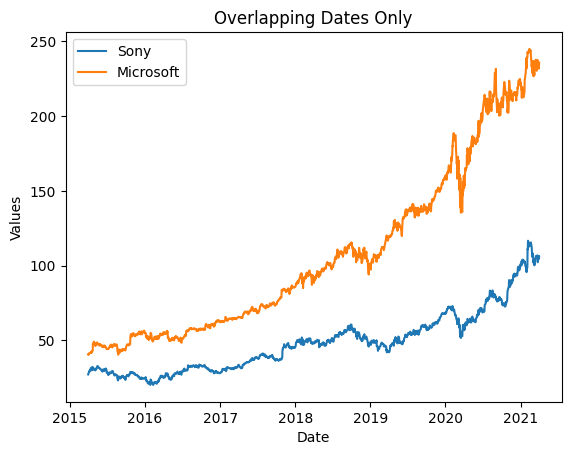

In [11]:
common_dates = rdd1_parsed.keys().intersection(rdd2_parsed.keys()).collect()

filtered_rdd1 = rdd1_parsed.filter(lambda x: x[0] in common_dates)
filtered_rdd2 = rdd2_parsed.filter(lambda x: x[0] in common_dates)

dates1, values1 = zip(*filtered_rdd1.collect())
dates2, values2 = zip(*filtered_rdd2.collect())

plt.plot(dates1, values1, label='Sony')
plt.plot(dates2, values2, label='Microsoft')

plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Overlapping Dates Only')
plt.legend()
plt.show()

We zien duidelijk dat beide bedrijven dezelfde markttrenden volgen. Natuurlijk is dit veel meer zichtbaar in de beurswaarde van microsoft die in meer markten speelt dan Sony.

## Apple
Een concurent op vlak van computers en software(ios).  
In deze dataset zijn de dates achterstevoren wat betekend dat de grafiek ook achterstevoren is.

In [12]:
Apple = spark.read.format('csv').option('header', 'true').load('../dataset/AAPL.csv')
#Apple.take(10)

In [13]:
Apple_stock = Apple.rdd.map(lambda r: (r['Date'],float(r[' Open'].split('$')[1]),float(r[' Close/Last'].split('$')[1]),float(r[' High'].split('$')[1]),float(r[' Low'].split('$')[1])))
#Apple_stock.take(10)

In [14]:
Apple_close = Apple.rdd.map(lambda r: (r['Date'],float(r[' Close/Last'].split('$')[1])))
#Apple_close.take(10)

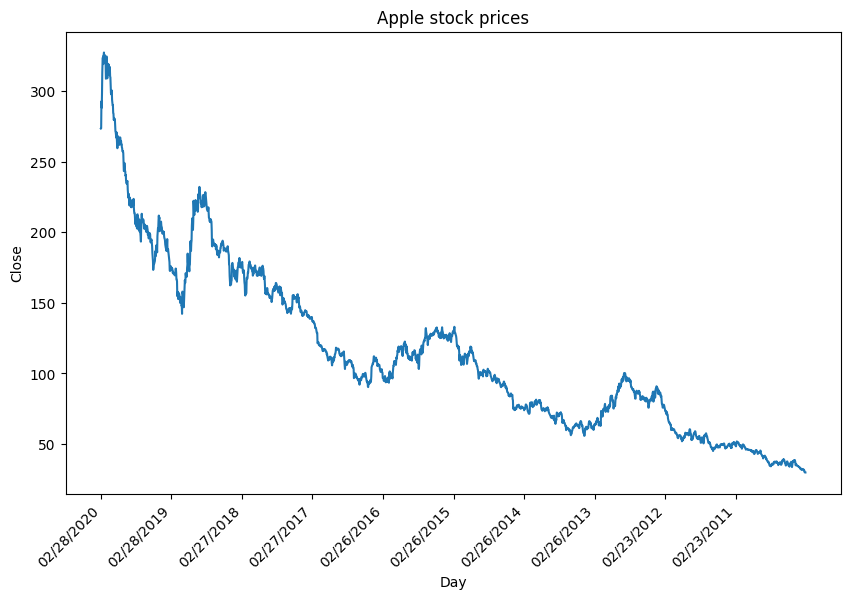

In [15]:
Date = Apple_stock.map(lambda r: r[0]).collect()
Open = Apple_stock.map(lambda r: float(r[1])).collect()
Close = Apple_stock.map(lambda r: float(r[2])).collect()
High = Apple_stock.map(lambda r: float(r[3])).collect()
Low = Apple_stock.map(lambda r: float(r[4])).collect()

plt.figure(figsize=(10, 6))
plt.plot(Date,Close)
plt.xticks(np.arange(0, 2518, step=252))
plt.xticks(rotation=45, ha='right')
plt.xlabel('Day')
plt.ylabel('Close')
plt.title('Apple stock prices')
plt.show()

We kunnen releases van nieuwe producten redelijk goed zien. We zien ook herhaalde trends die bij de vergelijking weer duidelijk zullen worden.

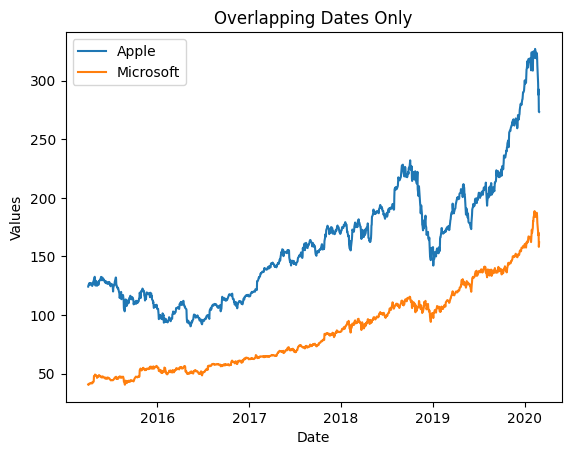

In [16]:
rdd1_parsed = Apple_close.map(parse_date)
rdd2_parsed = Microsoft_close.map(parse_date)

common_dates = rdd1_parsed.keys().intersection(rdd2_parsed.keys()).collect()

filtered_rdd1 = rdd1_parsed.filter(lambda x: x[0] in common_dates)
filtered_rdd2 = rdd2_parsed.filter(lambda x: x[0] in common_dates)

dates1, values1 = zip(*filtered_rdd1.collect())
dates2, values2 = zip(*filtered_rdd2.collect())

plt.plot(dates1, values1, label='Apple')
plt.plot(dates2, values2, label='Microsoft')

plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Overlapping Dates Only')
plt.legend()
plt.show()

Apple is voor Microsoft wat Microsoft voor Sony is, we zien weer herhaalde trends maar ook dat ze op veel plaatsen omgekeerd evenredig zijn.

## Google
???  
Google zijn dataset heeft geen enkele problemen.

In [17]:
Google = spark.read.format('csv').option('header', 'true').load('../dataset/GOOGL.csv')
#Google.take(10)

In [18]:
Google_stock = Google.rdd.map(lambda r: (r['Date'],float(r['Open']),float(r['Close']),float(r['High']),float(r['Low'])))
#Google_stock.take(10)

In [19]:
Google_close = Google.rdd.map(lambda r: (r['Date'],float(r['Close'])))
#Google_close.take(10)

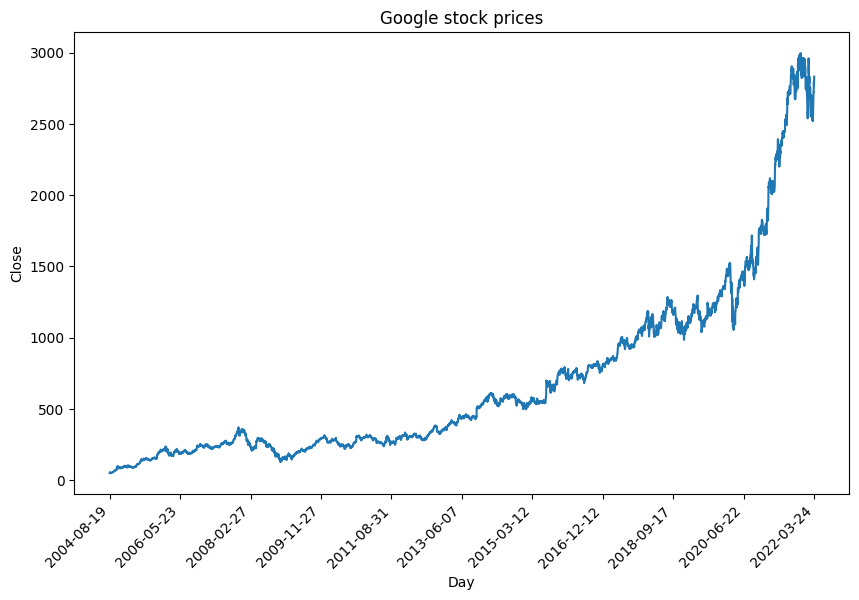

In [20]:
Date = Google_stock.map(lambda r: r[0]).collect()
Open = Google_stock.map(lambda r: float(r[1])).collect()
Close = Google_stock.map(lambda r: float(r[2])).collect()
High = Google_stock.map(lambda r: float(r[3])).collect()
Low = Google_stock.map(lambda r: float(r[4])).collect()

plt.figure(figsize=(10, 6))
plt.plot(Date,Close)
plt.xticks(np.arange(0, 4431, step=443))
plt.xticks(rotation=45, ha='right')
plt.xlabel('Day')
plt.ylabel('Close')
plt.title('Google stock prices')
plt.show()

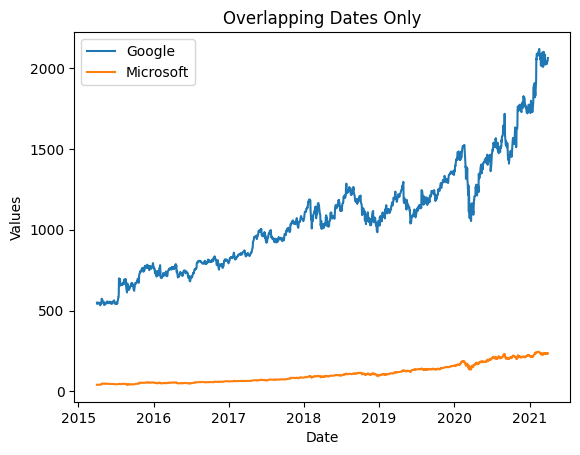

In [21]:
rdd1_parsed = Google_close.map(parse_date)
rdd2_parsed = Microsoft_close.map(parse_date)

common_dates = rdd1_parsed.keys().intersection(rdd2_parsed.keys()).collect()

filtered_rdd1 = rdd1_parsed.filter(lambda x: x[0] in common_dates)
filtered_rdd2 = rdd2_parsed.filter(lambda x: x[0] in common_dates)

dates1, values1 = zip(*filtered_rdd1.collect())
dates2, values2 = zip(*filtered_rdd2.collect())

plt.plot(dates1, values1, label='Google')
plt.plot(dates2, values2, label='Microsoft')

plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Overlapping Dates Only')
plt.legend()
plt.show()

Hier valt redelijk weinig te zien, Google is gewwon zoveel groter. De grote trends blijven er wel maar google voelt ze veel minder

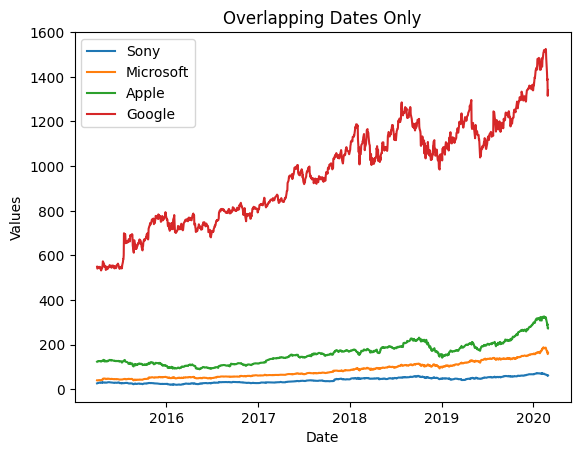

In [22]:
rdd1_parsed = Sony_close.map(parse_date)
rdd2_parsed = Microsoft_close.map(parse_date)
rdd3_parsed = Apple_close.map(parse_date)
rdd4_parsed = Google_close.map(parse_date)

common_dates = rdd1_parsed.keys().intersection(rdd2_parsed.keys()).intersection(rdd3_parsed.keys()).intersection(rdd4_parsed.keys()).collect()

filtered_rdd1 = rdd1_parsed.filter(lambda x: x[0] in common_dates)
filtered_rdd2 = rdd2_parsed.filter(lambda x: x[0] in common_dates)
filtered_rdd3 = rdd3_parsed.filter(lambda x: x[0] in common_dates)
filtered_rdd4 = rdd4_parsed.filter(lambda x: x[0] in common_dates)

dates1, values1 = zip(*filtered_rdd1.collect())
dates2, values2 = zip(*filtered_rdd2.collect())
dates3, values3 = zip(*filtered_rdd3.collect())
dates4, values4 = zip(*filtered_rdd4.collect())

plt.plot(dates1, values1, label='Sony')
plt.plot(dates2, values2, label='Microsoft')
plt.plot(dates3, values3, label='Apple')
plt.plot(dates4, values4, label='Google')

plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Overlapping Dates Only')
plt.legend()
plt.show()

We kunnen zien dat alle bedrijven dezelfde trends volgen maar ook dat bedrijven zoals Google en Apple meer hun eigen patroon volgen dan andere.